In [166]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [167]:
Q0 =fits.open('01_Q0.lc')
Q1 =fits.open('01_Q1.lc')
Q2 =fits.open('01_Q2.lc')
Q3 =fits.open('01_Q3.lc')

In [168]:
Q0_time = Q1[1].data['TIME'][18710:20740]
Q0_rate = Q1[1].data['RATE'][18710:20740]

# for i in range(len(Q0_time)):
#     if int(Q0_time[i])==358904087:
#         print(i)

GRB_start = 1011
GRB_end = 1021

[30. 30.  0. ... 20. 60. 40.]
           2
8.706e-13 x + 3.14e-08 x - 1.121e+05


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


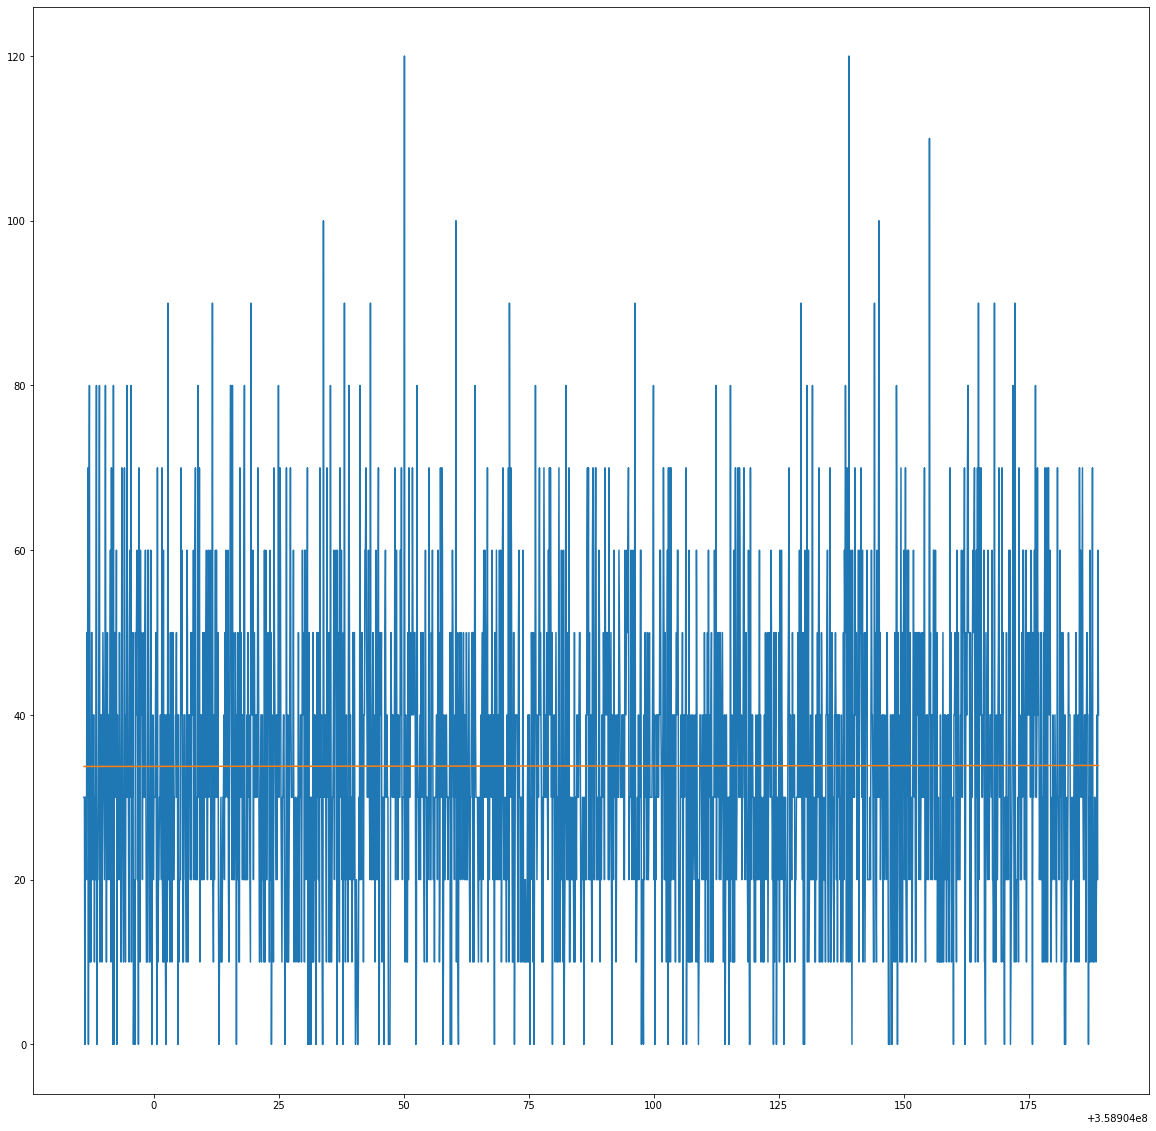

In [169]:
noise = np.concatenate([Q0_rate[:GRB_start], [np.nan]*(GRB_end-GRB_start),Q0_rate[GRB_end:]])
print(noise)
Q0_trend = signal.savgol_filter(noise , 100, 5)
valid = ~(np.isnan(Q0_trend))
model = np.poly1d(np.polyfit(Q0_time[valid], Q0_trend[valid], 2))
Q0_detrend_data = Q0_rate-model(Q0_time)

print(model)
plt.figure(figsize=(20,20))
plt.plot(Q0_time,Q0_rate)
plt.plot(Q0_time,model(Q0_time))


In [170]:
signal = sum(Q0_detrend_data[1011:1021])
print(Q0_detrend_data[1011:1021])
noi = np.concatenate([Q0_detrend_data[0:1011] , Q0_detrend_data[1021:]])
std = np.std(noi)
print(signal,std)

[ 16.19407482 -13.80598767 -13.80605016   6.19388734 -13.80617515
 -23.80623764  26.19369986  36.19363737   6.19357488 -13.80648762]
11.93793603173981 18.893607660787218
